In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


In [3]:

import os
import numpy as np
import cv2

# Define the directory containing the dataset
dir_name = "C:/Users/user/dataset/faces"
y = []
X = []
target_names = []
person_id = 0
h = w = 300
n_samples = 0
class_names = []

# Iterate over each person's directory in the dataset
for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name) + "/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        # Formulate the image path
        image_path = os.path.join(dir_path, image_name)
        # Read the input image
        img = cv2.imread(image_path)
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Resize image to 300x300 dimension
        resized_image = cv2.resize(gray, (h, w))
        # Convert matrix to vector
        v = resized_image.flatten()
        X.append(v)
        # Increase the number of samples
        n_samples += 1
        # Adding the categorical label
        y.append(person_id)
        #adding the person name
        target_names.append(person_name)
    # Increase the person ID by 1
    person_id += 1

# Transform list to numpy array
y = np.array(y)
X = np.array(X)
target_names = np.array(target_names)
n_features = X.shape[1]
print(y.shape, X.shape, target_names.shape)
print("Number of samples: ", n_samples)

n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)



(450,) (450, 90000) (450,)
Number of samples:  450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


In [5]:
# Split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Extracting the top 150 eigenfaces from 337 faces


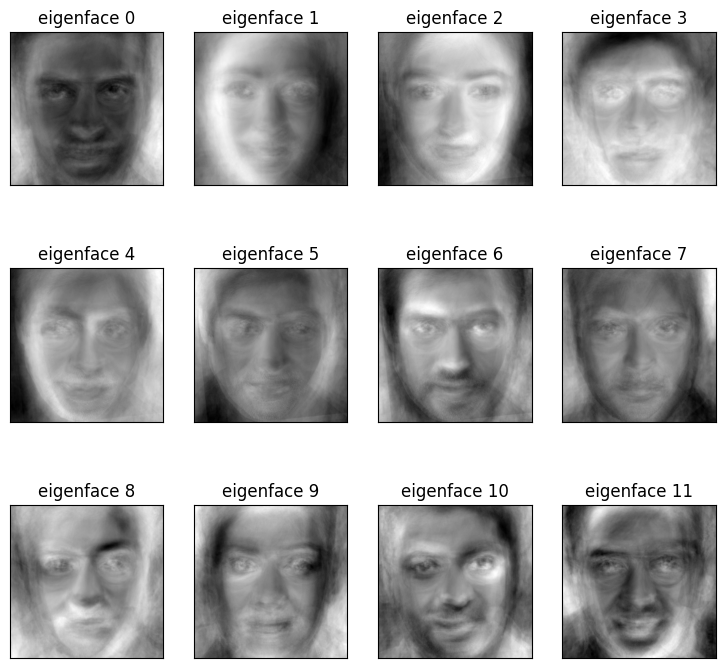

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)


In [7]:
n_components = 150
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

# Applying PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
# Generating eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

# Plot the gallery of the most significant eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)


In [9]:
# Compute LDA of reduced data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("LDA transformation done...")


LDA transformation done...


In [11]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10), max_iter=5000, verbose=True).fit(X_train_lda, y_train)
print("Model Weights: ")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)


Iteration 1, loss = 2.88445272
Iteration 2, loss = 2.83614269
Iteration 3, loss = 2.78917420
Iteration 4, loss = 2.74279080
Iteration 5, loss = 2.69726145
Iteration 6, loss = 2.65415440
Iteration 7, loss = 2.60964714
Iteration 8, loss = 2.56686633
Iteration 9, loss = 2.52543989
Iteration 10, loss = 2.48367453
Iteration 11, loss = 2.44284760
Iteration 12, loss = 2.40390543
Iteration 13, loss = 2.36581425
Iteration 14, loss = 2.32946212
Iteration 15, loss = 2.29235150
Iteration 16, loss = 2.25752628
Iteration 17, loss = 2.22259088
Iteration 18, loss = 2.18911023
Iteration 19, loss = 2.15703160
Iteration 20, loss = 2.12516983
Iteration 21, loss = 2.09496904
Iteration 22, loss = 2.06541360
Iteration 23, loss = 2.03705768
Iteration 24, loss = 2.00891081
Iteration 25, loss = 1.98157568
Iteration 26, loss = 1.95533163
Iteration 27, loss = 1.92915418
Iteration 28, loss = 1.90409915
Iteration 29, loss = 1.87919414
Iteration 30, loss = 1.85533491
Iteration 31, loss = 1.83126450
Iteration 32, los

Accuracy:  75.22123893805309


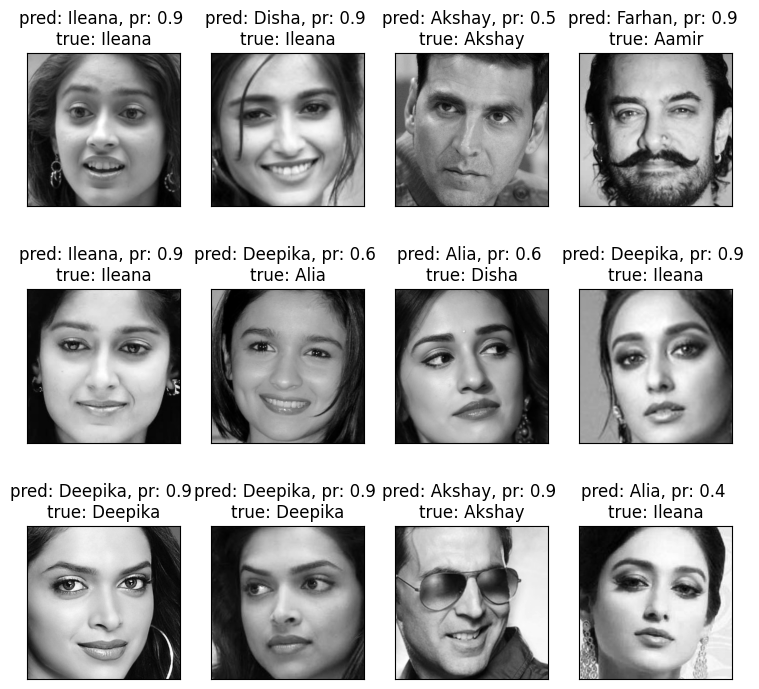

In [13]:
y_pred = []
y_prob = []

# Predict probabilities for each test face
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.argmax(prob)  # Get the index of the highest probability
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

# Transform the data
y_pred = np.array(y_pred)

prediction_titles = []
true_positive = 0

# Create prediction titles and count true positives
for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)
    prediction_titles.append(result)
    if true_name == pred_name:
        true_positive += 1

# Calculate accuracy
accuracy = true_positive * 100 / y_pred.shape[0]
print("Accuracy: ", accuracy)

# Plot results
plot_gallery(X_test, prediction_titles, h, w)
plt.show()
